In [5]:
import os, sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandasql import sqldf

rpath = os.path.abspath('..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

import scripts.read_data_from_db as rd
import scripts.data_cleaning as dc
import scripts.utils as util

In [6]:
df = rd.read_data(table_name='processed_data')

INFO:scripts.read_data_from_db:Data fetched succesfully


### Handle outliers

In [8]:
quantitative_columns = [
        "Avg RTT DL (ms)",                             
        "Avg RTT UL (ms)",   
        "Avg Bearer TP DL (kbps)",
        "Avg Bearer TP UL (kbps)",                          
        "TCP DL Retrans. Vol (Bytes)",                  
        "TCP UL Retrans. Vol (Bytes)",                  
        "DL TP < 50 Kbps (%)",                            
        "50 Kbps < DL TP < 250 Kbps (%)",              
        "250 Kbps < DL TP < 1 Mbps (%)",                  
        "DL TP > 1 Mbps (%)",                             
        "UL TP < 10 Kbps (%)",                           
        "10 Kbps < UL TP < 50 Kbps (%)",                 
        "50 Kbps < UL TP < 300 Kbps (%)",                 
        "UL TP > 300 Kbps (%)",
        "Activity Duration DL (ms)",
        "Activity Duration UL (ms)",                           
        "HTTP DL (Bytes)",                              
        "HTTP UL (Bytes)", 
        "Dur. (ms).1",                            
        "Nb of sec with 125000B < Vol DL",  
        "Nb of sec with 1250B < Vol UL < 6250B",        
        "Nb of sec with 31250B < Vol DL < 125000B",                   
        "Nb of sec with 6250B < Vol DL < 31250B",       
        "Nb of sec with Vol DL < 6250B",                  
        "Nb of sec with Vol UL < 1250B", 
        "Social Media DL (Bytes)",
        "Social Media UL (Bytes)",
        "Youtube DL (Bytes)",
        "Youtube UL (Bytes)",
        "Netflix DL (Bytes)",
        "Netflix UL (Bytes)",
        "Google DL (Bytes)",
        "Google UL (Bytes)",
        "Email DL (Bytes)",
        "Email UL (Bytes)",
        "Gaming DL (Bytes)",
        "Gaming UL (Bytes)",
        "Other DL (Bytes)",
        "Other UL (Bytes)",
        "Total DL (Bytes)",
        "Total UL (Bytes)"
]
df = dc.handle_outliers(df, quantitative_columns)

In [9]:
df.shape

(150000, 53)

In [10]:
descriptive_stats = df[quantitative_columns].describe()
descriptive_stats

,Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),TCP DL Retrans. Vol (Bytes),TCP UL Retrans. Vol (Bytes),DL TP < 50 Kbps (%),50 Kbps < DL TP < 250 Kbps (%),250 Kbps < DL TP < 1 Mbps (%),DL TP > 1 Mbps (%),...,Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
count,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,...,1.500000e+05,1.500000e+05,1.500000e+05,150000.000000,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05,1.500000e+05
mean,69.124281,10.310551,10191.444003,999.080416,1.553554e+07,591435.616852,96.136341,1.601161,0.735241,0.492502,...,5.752581e+06,2.056414e+06,1.791630e+06,467286.270794,4.220811e+08,8.289261e+06,4.210773e+08,8.264251e+06,4.546670e+08,4.112113e+07
std,30.956429,7.328903,15362.617972,1714.504351,8.232164e+06,288831.752008,6.286048,2.708729,1.403699,1.050390,...,2.825580e+06,1.016227e+06,8.845197e+05,230369.974411,2.084387e+08,4.084147e+06,2.075413e+08,4.068046e+06,2.083796e+08,8.653655e+06
min,26.000000,1.000000,11.000000,18.000000,3.184700e+04,5781.000000,74.000000,0.000000,0.000000,0.000000,...,5.789490e+05,2.046170e+05,1.771600e+05,46735.000000,4.212567e+07,8.316970e+05,4.176727e+07,8.181880e+05,7.460698e+07,2.244624e+07
25%,40.000000,4.000000,44.000000,49.000000,8.787242e+06,563447.706365,94.000000,0.000000,0.000000,0.000000,...,3.457238e+06,1.231967e+06,1.076802e+06,280245.750000,2.526559e+08,4.953369e+06,2.522608e+08,4.962380e+06,2.854479e+08,3.495170e+07
50%,66.000000,9.000000,124.000000,84.000000,2.080991e+07,759658.664811,100.000000,0.000000,0.000000,0.000000,...,5.750753e+06,2.056542e+06,1.791729e+06,467373.441940,4.220447e+08,8.288398e+06,4.211005e+08,8.264799e+06,4.546434e+08,4.112121e+07
75%,109.795706,17.662883,13300.045927,1626.000000,2.080991e+07,759658.664811,100.000000,2.105920,1.000000,0.791830,...,8.061132e+06,2.878961e+06,2.511522e+06,653045.000000,5.906400e+08,1.160446e+07,5.889088e+08,1.154392e+07,6.232569e+08,4.728196e+07
max,120.000000,29.000000,62544.000000,10557.000000,2.080991e+07,759658.664811,100.000000,11.000000,6.000000,5.000000,...,1.088647e+07,3.910628e+06,3.406776e+06,889979.000000,8.015270e+08,1.573188e+07,8.008305e+08,1.571875e+07,8.342894e+08,5.973914e+07


### Graphical Univarate analysis

#### Histogram of AvgRTT DL(ms)

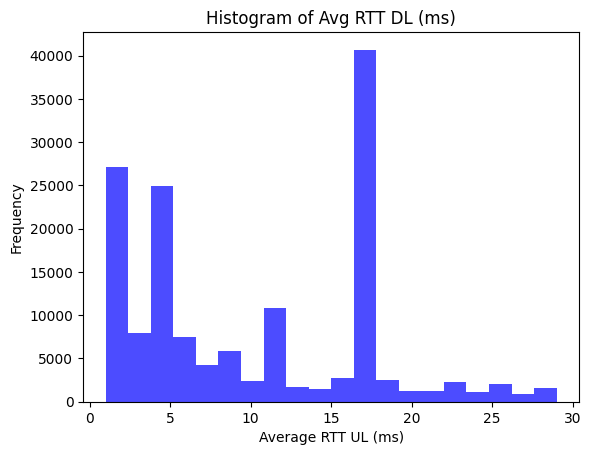

In [11]:
plt.hist(df['Avg RTT UL (ms)'], bins=20, color='blue', alpha=0.7)
plt.xlabel('Average RTT UL (ms)')
plt.ylabel('Frequency')
plt.title('Histogram of Avg RTT DL (ms)')
plt.show()


##### Right Skewness:

The right-skewed shape indicates that the majority of users experience relatively lower values of Avg RTT DL.

##### 

Long Bin at the Center:

A long bin at the center means that there is a concentration of users with similar or central values of Avg RTT DL.


#### Boxplot of Avg Bearer TP DL(kbps)

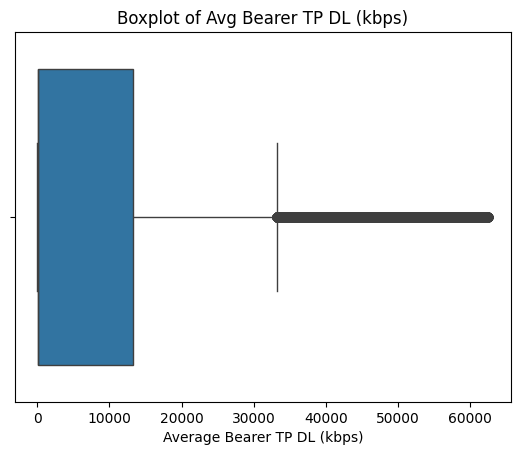

In [12]:
sns.boxplot(x=df['Avg Bearer TP DL (kbps)'])
plt.xlabel('Average Bearer TP DL (kbps)')
plt.title('Boxplot of Avg Bearer TP DL (kbps)')
plt.show()


##### Implication

The large height in the interquartile range show that there is a spred or variability of data and the limited width (0 -20,000 apx.) tell us that the central portion of data is concentrated within a relatively small range.

### Bar chart of Handset Type

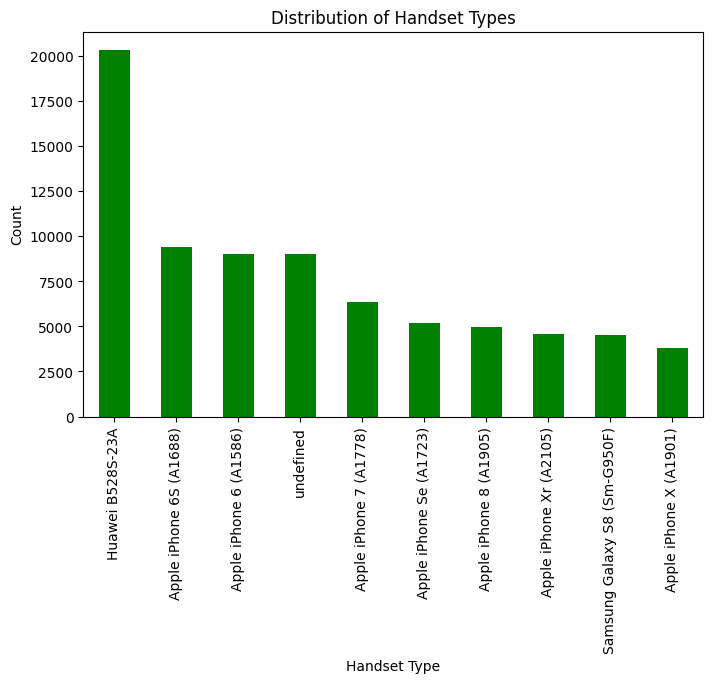

In [13]:
plt.figure(figsize=(8, 5))
df['Handset Type'].value_counts().head(10).plot(kind='bar', color='green')
plt.xlabel('Handset Type')
plt.ylabel('Count')
plt.title('Distribution of Handset Types')
plt.show()


### correlation Analysis

In [14]:
correlation_matrix = df[
    [
        "Social Media DL (Bytes)",
        "Social Media UL (Bytes)",
        "Youtube DL (Bytes)",
        "Youtube UL (Bytes)",
        "Netflix DL (Bytes)",
        "Netflix UL (Bytes)",
        "Google DL (Bytes)",
        "Google UL (Bytes)",
        "Email DL (Bytes)",
        "Email UL (Bytes)",
        "Gaming DL (Bytes)",
        "Gaming UL (Bytes)",
        "Other DL (Bytes)",
        "Other UL (Bytes)",
        "Total DL (Bytes)",
        "Total UL (Bytes)"
]].corr()
correlation_matrix

,Social Media DL (Bytes),Social Media UL (Bytes),Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total DL (Bytes),Total UL (Bytes)
Social Media DL (Bytes),1.000000,0.002096,-0.006553,0.003827,-0.000658,0.000927,-0.004161,0.002318,0.004472,-0.001491,0.000459,0.002430,0.007033,-0.002167,0.001126,0.006441
Social Media UL (Bytes),0.002096,1.000000,0.000497,-0.003237,-0.000393,-0.003075,0.001341,-0.001237,0.002500,-0.001550,0.000254,-0.002633,-0.002107,0.001403,-0.001051,-0.000301
Youtube DL (Bytes),-0.006553,0.000497,1.000000,0.002850,0.000437,-0.000274,0.000890,-0.000084,0.001383,0.001137,-0.003587,-0.003692,0.003217,-0.000369,-0.003170,0.000061
Youtube UL (Bytes),0.003827,-0.003237,0.002850,1.000000,-0.001145,0.002484,-0.001699,-0.003382,-0.002841,-0.005033,-0.001692,0.002459,0.001830,0.000923,-0.000312,0.391468
Netflix DL (Bytes),-0.000658,-0.000393,0.000437,-0.001145,1.000000,0.002300,-0.000059,0.001053,0.007507,-0.001689,-0.005639,-0.000026,-0.006689,-0.000793,-0.004919,-0.000121
Netflix UL (Bytes),0.000927,-0.003075,-0.000274,0.002484,0.002300,1.000000,-0.001137,-0.001250,-0.001028,-0.000710,0.001968,-0.004295,-0.006619,0.000704,0.000753,0.391033
Google DL (Bytes),-0.004161,0.001341,0.000890,-0.001699,-0.000059,-0.001137,1.000000,-0.000970,-0.000504,0.001337,0.000761,-0.002075,-0.000940,-0.000221,0.001879,-0.000972
Google UL (Bytes),0.002318,-0.001237,-0.000084,-0.003382,0.001053,-0.001250,-0.000970,1.000000,-0.001329,-0.001198,0.002001,-0.001016,0.000765,-0.003441,0.001963,0.058690
Email DL (Bytes),0.004472,0.002500,0.001383,-0.002841,0.007507,-0.001028,-0.000504,-0.001329,1.000000,0.003597,0.002077,-0.002402,-0.001483,0.003924,0.001917,0.000053
Email UL (Bytes),-0.001491,-0.001550,0.001137,-0.005033,-0.001689,-0.000710,0.001337,-0.001198,0.003597,1.000000,-0.001780,0.003872,-0.002158,-0.000340,-0.000425,0.008846


A correlation close to 1 indicates a strong positive relationship, close to -1 indicates a strong negative relationship, and close to 0 indicates a weak relationship.



### Bivariate Plot

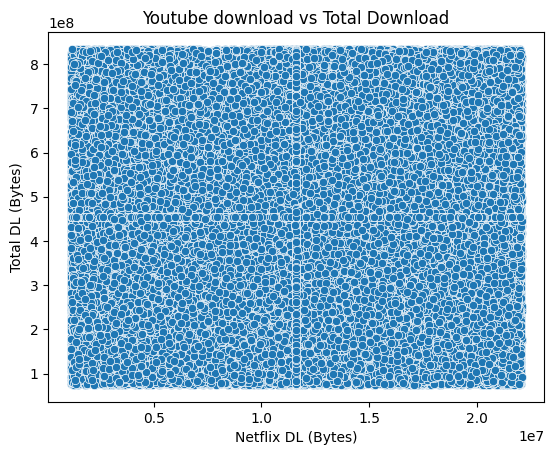

In [15]:
sns.scatterplot(x='Netflix DL (Bytes)', y='Total DL (Bytes)', data=df)
plt.title('Youtube download vs Total Download')
plt.show()